# Сравнение ускорения в зависимости от числа процессов

In [1]:
!ls

data.txt	    results_10000.csv  results_500000.csv  timing.ipynb
results_100000.csv  results_2000.csv   results_50000.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Ускорение при различной мелкости разбиения

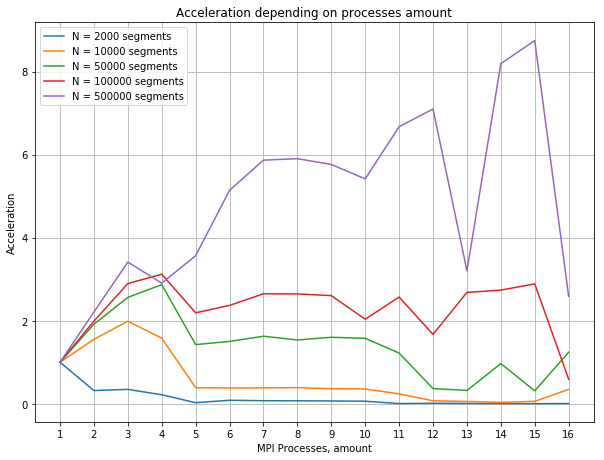

In [3]:
fig = plt.figure(figsize=(8.5, 6.5))

files = [("results_2000.csv", "N = 2000 segments"),\
         ("results_10000.csv", "N = 10000 segments"),\
         ("results_50000.csv", "N = 50000 segments"),\
         ("results_100000.csv", "N = 100000 segments"),\
         ("results_500000.csv", "N = 500000 segments")] 

dfs = []
for file, info in files:
    try:
        dfs.append((pd.read_csv(file), info))
    except:
        pass

ax = fig.add_subplot(111)
ax.set_title(r'Acceleration depending on processes amount')
ax.set_xlabel('MPI Processes, amount')
ax.set_ylabel('Acceleration')

for df, info in dfs:
    ax.plot(df.values[:, 0], df.values[0, 1]/df.values[:, 1], label=info)

ax.set_xticks(np.arange(1, 17))
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Картинка

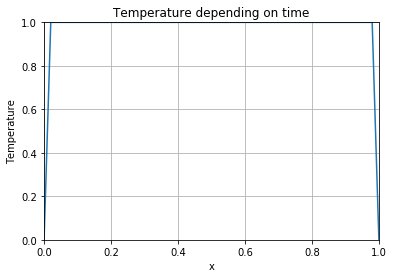

In [4]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"

class DrawGraph(object):
    def __init__(self, ax, xs, ys):
        self.ax = ax
        self.xs = xs
        self.ys = ys
        self.line, = ax.plot([],[])

    def __call__(self, i):
        self.line.set_data(self.xs, self.ys[i])
        return self.line,

fig, ax = plt.subplots()
ax.set_title(r'Temperature depending on time')
ax.set_xlabel('x')
ax.set_ylabel('Temperature')
# Set up plot parameters
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True)

val = df = pd.read_csv("data.txt", header=None).values
xs = val[0]
ys = val[1:]
dg = DrawGraph(ax, xs, ys)
anim = FuncAnimation(fig, dg, frames=range(ys.shape[0]), interval=50, blit=True)

In [5]:
anim